In [27]:
import pandas as pd

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px

from Functions import dunn_index
from Functions import standardize

In [28]:
df = pd.read_csv("./Dataset/Clean.csv")
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000


In [29]:
df = standardize(df)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727


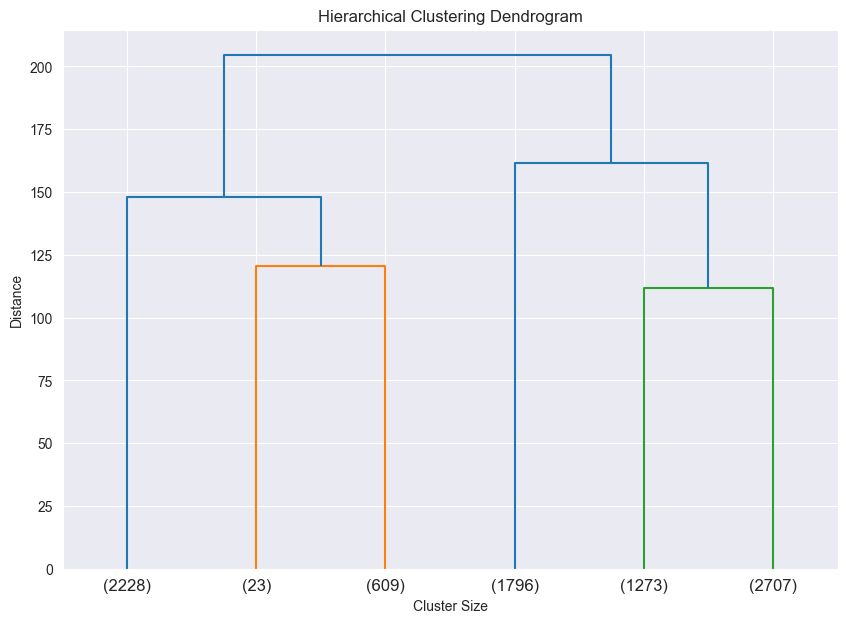

In [30]:
# Perform hierarchical clustering
linkage_matrix = linkage(df, method='ward', metric='euclidean', optimal_ordering=False)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [31]:
# Cut the dendrogram, with distance threshold
# threshold_distance = 200000
n_clusters = 4
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Add cluster labels
df['Cluster'] = clusters

In [32]:
# Check the resulting clusters
print(df[['Cluster']].head())
print(df['Cluster'].value_counts())
cluster_summary = df.groupby('Cluster').mean()

print(cluster_summary)

   Cluster
0        4
1        3
2        1
3        4
4        4
Cluster
4    3980
1    2228
3    1796
2     632
Name: count, dtype: int64
          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
1       -0.483543           0.339243   0.082060         -0.036770   
2        0.741907           0.453507   2.238506          1.942774   
3        1.026900           0.319600  -0.225795         -0.174020   
4       -0.310519          -0.406144  -0.299507         -0.209389   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
1                      0.261165     -0.435678             1.055339   
2                      1.721997     -0.246486             1.130353   
3                     -0.214187      1.140110            -0.422939   
4                     -0.322990     -0.231449            -0.579417   

         ONEOFF_PURCHASE

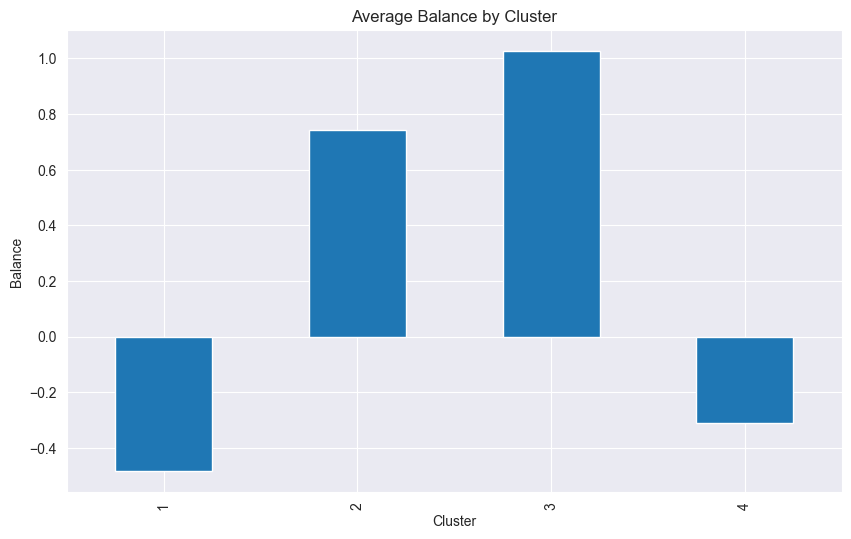

In [33]:
cluster_summary['BALANCE'].plot(kind='bar', title='Average Balance by Cluster', figsize=(10, 6))
plt.ylabel('Balance')
plt.show()

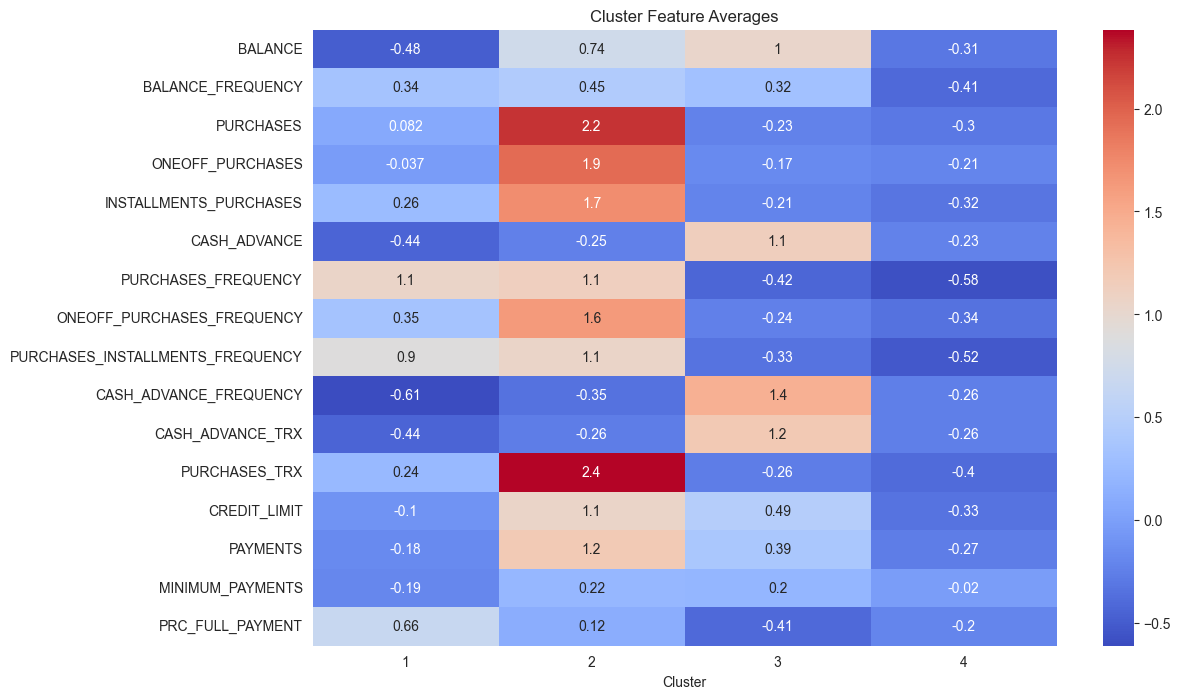

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, cmap='coolwarm', annot=True)
plt.title('Cluster Feature Averages')
plt.show()

In [35]:
dunn = dunn_index(df, clusters)
print(f"Dunn index: {dunn}")

Dunn index: 0.027414596697096578


In [36]:
pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
pca_components = pca.fit_transform(df.drop(columns=['Cluster']))  # Exclude 'Cluster' column for PCA
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = df['Cluster']  # Add the cluster labels

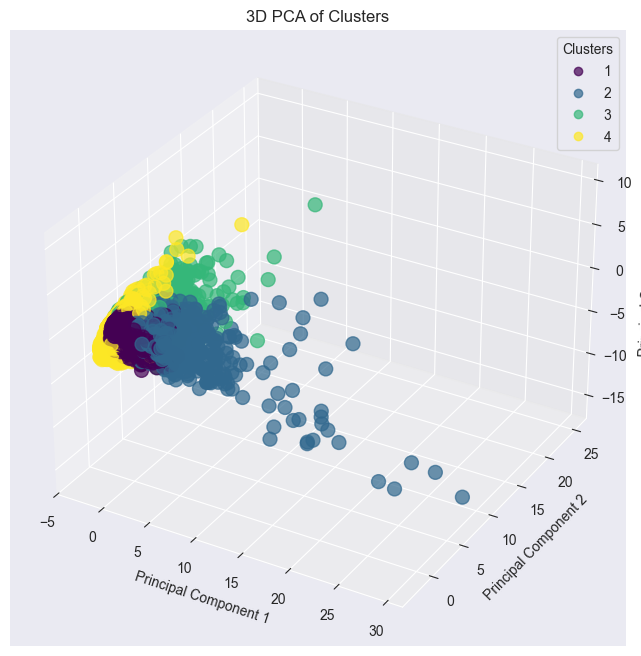

In [37]:
# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [45]:
pca = PCA(n_components=3) 
pca_components = pca.fit_transform(df.drop(columns=['Cluster']))  # Remove 'Cluster' column for PCA

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = df['Cluster']  # Add the cluster labels

# Create the 3D scatter plot
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', title="3D PCA of Clusters",
                    labels={'PC1': 'PC 1', 'PC2': 'PC 2', 'PC3': 'PC 3'},
                    color_continuous_scale='viridis')
fig.update_layout(
    width=800,
    height=600,  
    autosize=True,  
)

fig.show()